In [1]:
import sys
import warnings

warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
    sys.path.append('..')
    !pip install easyagent
    


In [5]:
import easyagents.agents
easyagents.agents.seed=0
    
from easyagents.agents import get_backends, CemAgent, DqnAgent, DuelingDqnAgent, DoubleDqnAgent
from easyagents.callbacks import log, plot, duration

print(easyagents.__version__)
print(get_backends())

1.1.23
['default', 'tfagents', 'tensorforce', 'kerasrl']


In [14]:
backend='kerasrl'
#easyagents.callbacks.plot.on_play_end_clear_jupyter_display: bool = True
#easyagents.callbacks.plot.on_train_end_clear_jupyter_display: bool = True

### Cem

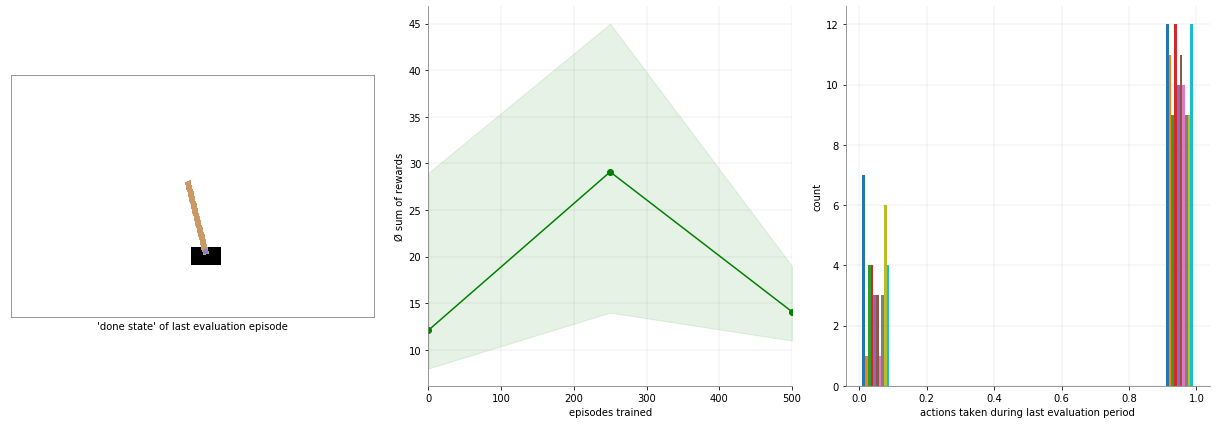

In [12]:
cemAgent = CemAgent('CartPole-v0', backend=backend, fc_layers=(16,16,16))
cemAgent.train([plot.State(),plot.Rewards(),plot.Actions()], num_iterations=10)

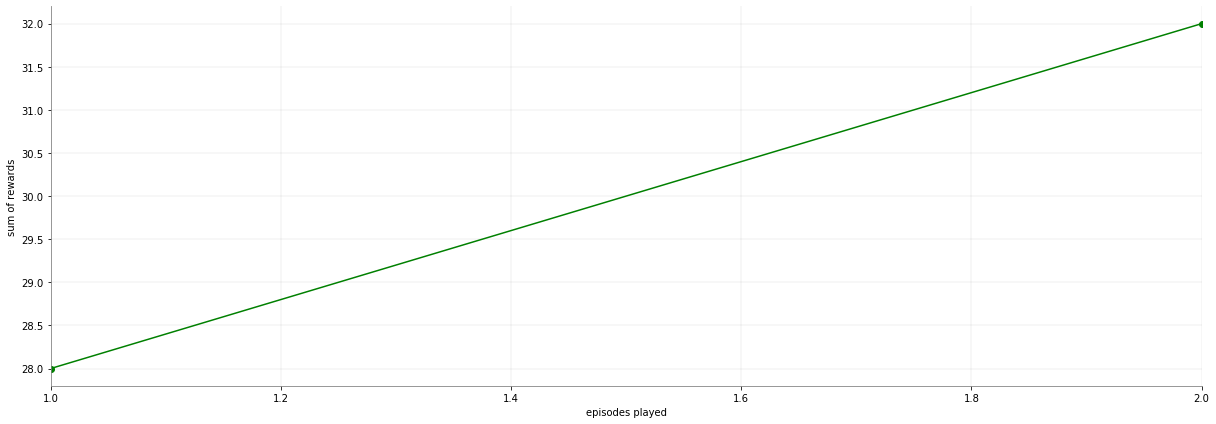

In [ ]:
cemAgent.play([plot.Rewards(),plot.Clear(on_play=False)],num_episodes=3)

### Dqn

Wall time: 1.6 s


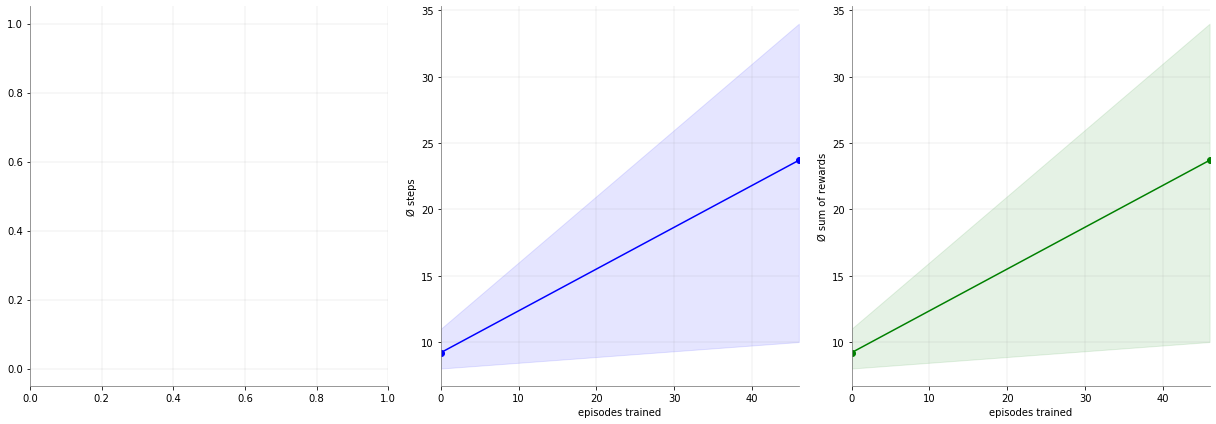

In [18]:
%%time
dqnAgent = DqnAgent('CartPole-v0',backend=backend)
dqnAgent.train(num_iterations=1000)


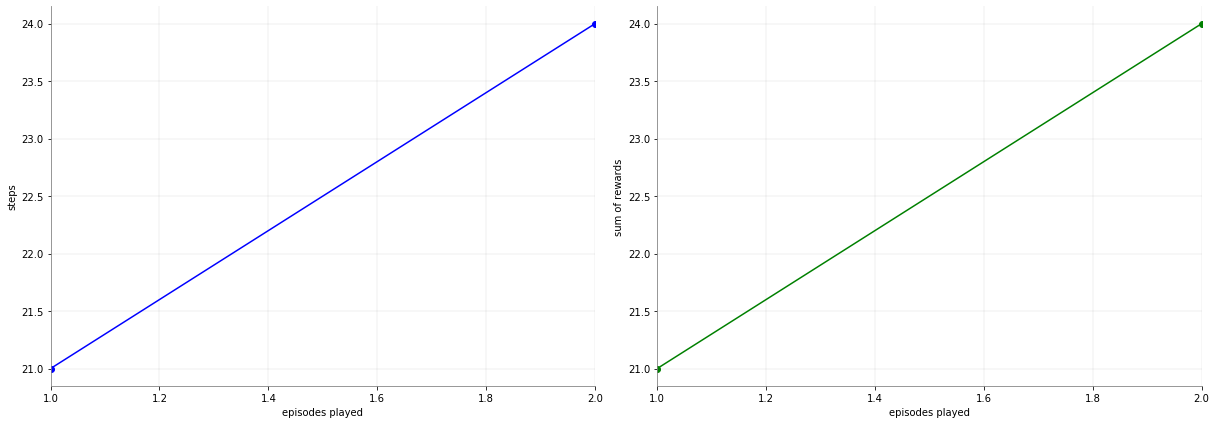

In [19]:
dqnAgent.play(num_episodes=2)

### Double Dqn

Wall time: 1.63 s


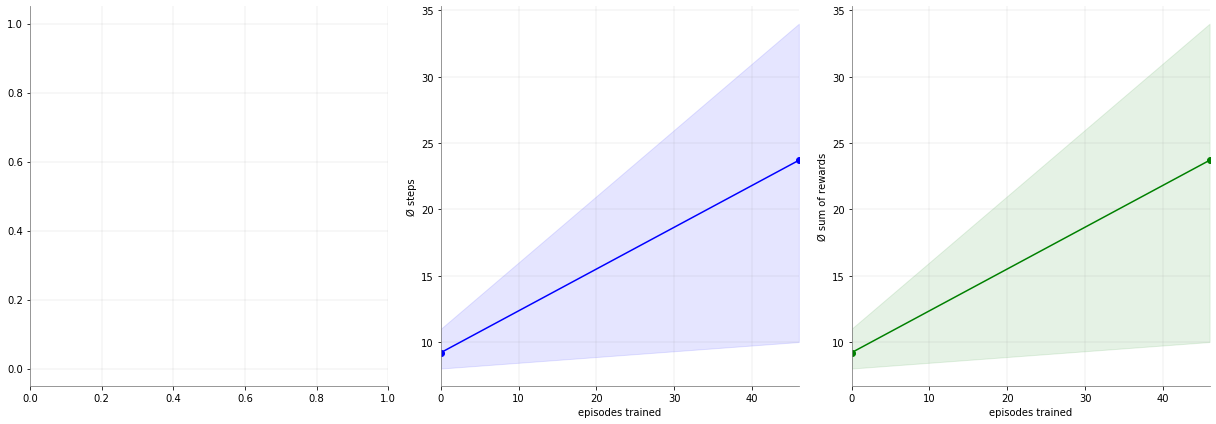

In [20]:
%%time
dqnAgent = DoubleDqnAgent('CartPole-v0',backend=backend)
dqnAgent.train(num_iterations=1000)


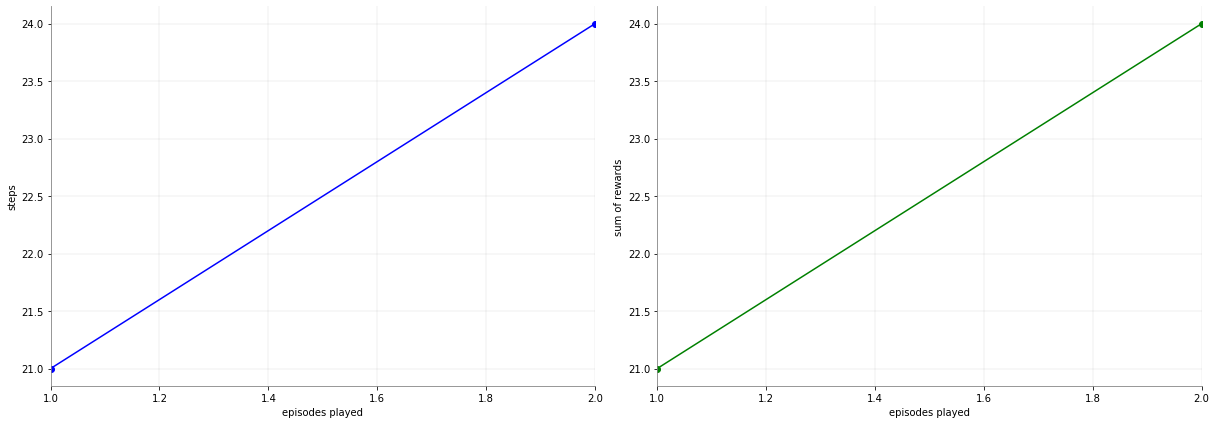

In [21]:
dqnAgent.play(num_episodes=2)

### Dueling Dqn

Wall time: 1.82 s


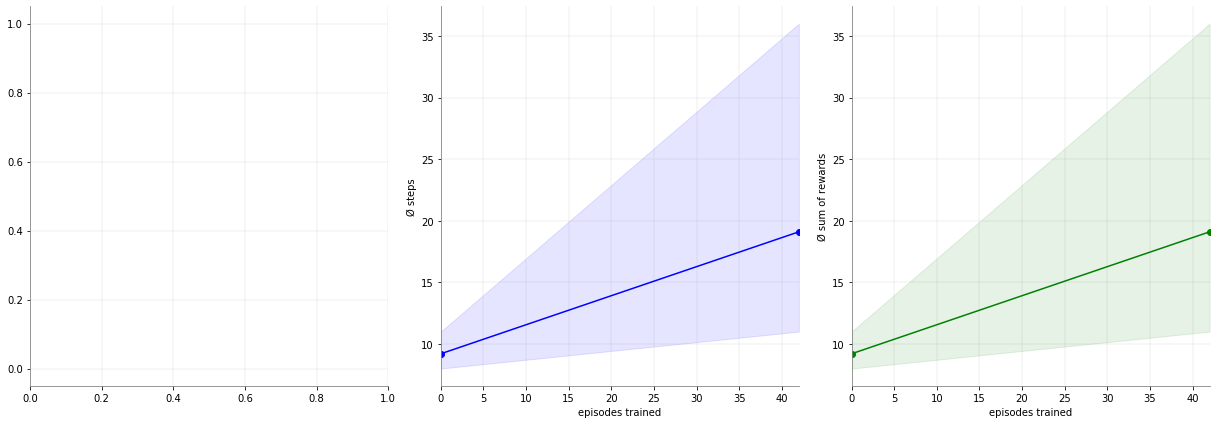

In [22]:
%%time
dqnAgent = DuelingDqnAgent('CartPole-v0',backend=backend)
dqnAgent.train(num_iterations=1000)


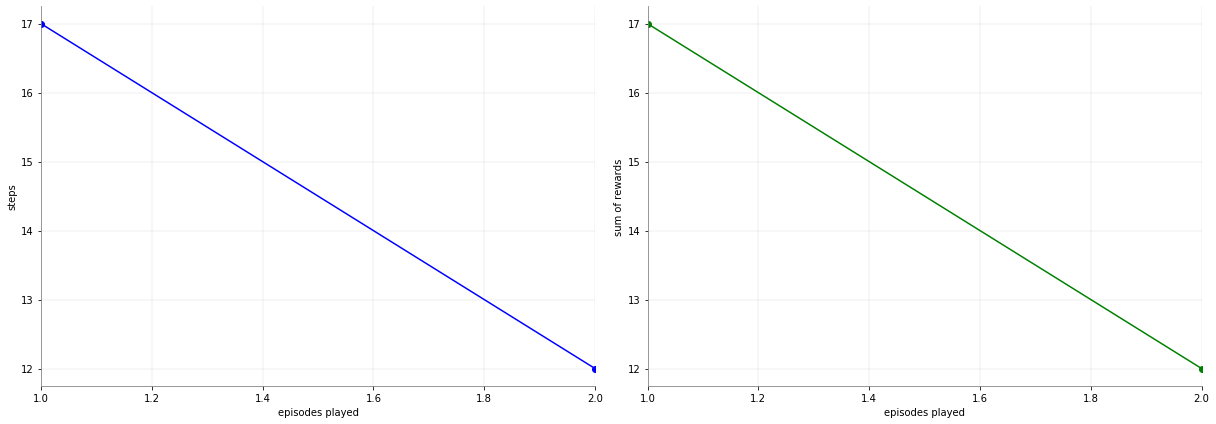

In [23]:
dqnAgent.play(num_episodes=2)